<a href="https://colab.research.google.com/github/AbduallahGamal/Covid-19-MyFirstProject/blob/main/Covid_19_MyFirstProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install tensorflow
import tensorflow as tf

In [2]:
# upload google drive in our colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# importing libraries
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [4]:
# create path for both (train/test)
train_loc = '/content/drive/MyDrive/our_DATA/train'
test_loc = '/content/drive/MyDrive/our_DATA/val'

In [5]:
# resize images & do data augmentation
trdata = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
traindata = trdata.flow_from_directory(directory = train_loc, target_size=(224,224))

tsdata = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
testdata = tsdata.flow_from_directory(directory = test_loc, target_size=(224,224))

Found 274 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [6]:
traindata.class_indices

{'COVID+': 0, 'COVID-': 1}

In [6]:
# define input
input_shape = (224,224,3)

# create the neural network
# input layer
image_input = Input(shape=input_shape, name='image_input')

# Build the model
firstConv2D = Conv2D(32, (3,3), padding='same', activation='relu', name='firstConv2D')(image_input)
secondConv2D = Conv2D(64, (3,3), padding='same', activation='relu', name='secondConv2D')(firstConv2D)
firstMaxPooling = MaxPool2D(pool_size=(2,2), strides=(2,2), name='firstMaxPooling')(secondConv2D)
firstDropout = Dropout(0.25, name='firstDropout')(firstMaxPooling)

thirdConv2D = Conv2D(64, (3,3), padding='same', activation='relu', name='thirdConv2D')(firstDropout)
secondMaxPooling = MaxPool2D(pool_size=(2,2), strides=(2,2), name='secondMaxPooling')(thirdConv2D)
secondDropout = Dropout(0.25, name='secondDropout')(secondMaxPooling)

fourthConv2D = Conv2D(128, (3,3), padding='same', activation='relu', name='fourthConv2D')(secondDropout)
thirdMaxPooling = MaxPool2D(pool_size=(2,2), strides=(2,2), name='thirdMaxPooling')(fourthConv2D)
thirdDropout = Dropout(0.25, name='thirdDropout')(thirdMaxPooling)

flattenLayer = Flatten(name='flattenLayer')(thirdDropout)
firstDenseLayer = Dense(64, name='firstDenseLayer')(flattenLayer)
fourthDropout = Dropout(0.5, name='fourthDropout')(firstDenseLayer)
predictionDenseLayer = Dense(2, activation='sigmoid', name='predictions')(fourthDropout)

In [7]:
# generate the model
model = Model(inputs=image_input, outputs=predictionDenseLayer, name='CNN_COVID-19_Predictions')

In [8]:
# print network structure
model.summary()

Model: "CNN_COVID-19_Predictions"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
firstConv2D (Conv2D)         (None, 224, 224, 32)      896       
_________________________________________________________________
secondConv2D (Conv2D)        (None, 224, 224, 64)      18496     
_________________________________________________________________
firstMaxPooling (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
firstDropout (Dropout)       (None, 112, 112, 64)      0         
_________________________________________________________________
thirdConv2D (Conv2D)         (None, 112, 112, 64)      36928     
_________________________________________________________________
secondMaxPooling (MaxPooling (None, 56, 56

In [9]:
# Compiling the model
model.compile(optimizer='adam', loss=binary_crossentropy, metrics=['accuracy'])

In [10]:
# start train & test
batch_size = 32
hist = model.fit(traindata, 
                 steps_per_epoch=traindata.samples//batch_size,
                 validation_data =testdata,
                 validation_steps =testdata.samples//batch_size,
                 epochs = 100)

Epoch 1/100
8/8 [==============================] - 21s 2s/step - loss: 2.3507 - accuracy: 0.7231 - val_loss: 0.5908 - val_accuracy: 0.7500
Epoch 2/100
8/8 [==============================] - 14s 2s/step - loss: 0.4004 - accuracy: 0.8636 - val_loss: 0.4039 - val_accuracy: 0.8646
Epoch 3/100
8/8 [==============================] - 14s 2s/step - loss: 0.3051 - accuracy: 0.8884 - val_loss: 0.3509 - val_accuracy: 0.8854
Epoch 4/100
8/8 [==============================] - 14s 2s/step - loss: 0.3044 - accuracy: 0.8678 - val_loss: 0.3265 - val_accuracy: 0.8958
Epoch 5/100
8/8 [==============================] - 14s 2s/step - loss: 0.2564 - accuracy: 0.9008 - val_loss: 0.3356 - val_accuracy: 0.9062
Epoch 6/100
8/8 [==============================] - 14s 2s/step - loss: 0.1954 - accuracy: 0.9421 - val_loss: 0.2614 - val_accuracy: 0.9479
Epoch 7/100
8/8 [==============================] - 14s 2s/step - loss: 0.1377 - accuracy: 0.9711 - val_loss: 0.2014 - val_accuracy: 0.9271
Epoch 8/100
8/8 [==========

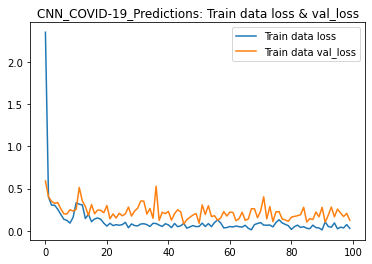

In [11]:
plt.plot(hist.history['loss'], label='Train data loss')
plt.plot(hist.history['val_loss'], label='Train data val_loss')
plt.title('CNN_COVID-19_Predictions: Train data loss & val_loss')
plt.legend()
plt.show()

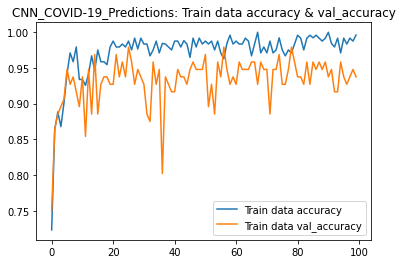

In [12]:
plt.plot(hist.history['accuracy'], label='Train data accuracy')
plt.plot(hist.history['val_accuracy'], label='Train data val_accuracy')
plt.title('CNN_COVID-19_Predictions: Train data accuracy & val_accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[28 31]
 [35 24]]
Classification Matrix
              precision    recall  f1-score   support

      COVID+       0.44      0.47      0.46        59
      COVID-       0.44      0.41      0.42        59

    accuracy                           0.44       118
   macro avg       0.44      0.44      0.44       118
weighted avg       0.44      0.44      0.44       118



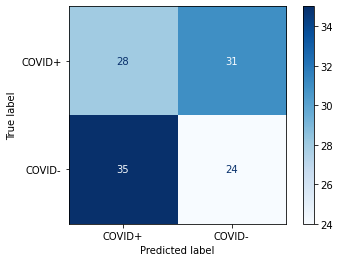

In [13]:
# Confusion matrix & Precision & Recall F1-score
target_names = ['COVID+', 'COVID-']
labels_names = [0,1]

Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(testdata.classes, y_pred=y_pred, labels=labels_names)

print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))

print('Classification Matrix')
print(classification_report(testdata.classes, y_pred=y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format='g')

plt.show()